In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 加载鸢尾花数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df_iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# 将特征值进行标准化处理
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df_iris.loc[:, features].values
y = df_iris.loc[:,['class']].values
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

##### principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

当使用PCA算法将数据集进行降维后，我们得到了主成分分析结果，其中包含了每个样本在不同主成分上的得分。将这些主成分分析结果保存在一个DataFrame中其中，principalComponents是通过PCA算法得到的主成分分析结果，包含了每个样本在不同主成分上的得分，['principal component 1', 'principal component 2']是新的DataFrame中两个主成分的名称。

##### finalDf = pd.concat([principalDf, df_iris[['class']]], axis = 1)

该语句将主成分分析得到的两个主成分作为列，并将其与鸢尾花数据集中的类别列（即原始数据集中的最后一列）组合成一个新的数据集finalDf。这样得到的数据集就是将原始数据降维到二维的结果，其中每一行代表一个样本，前两列是主成分分析得到的两个主成分的值，最后一列是该样本所属的类别。

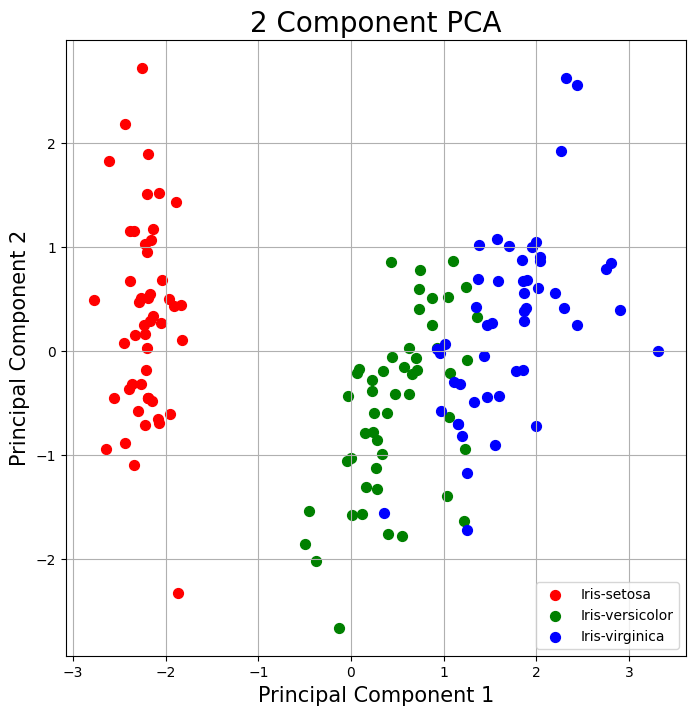

In [18]:
# 创建PCA对象
pca = PCA(n_components=2)

# 对数据集进行PCA降维
principalComponents = pca.fit_transform(x)

# 将降维后的数据转换为DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'principal component 1', 'principal component 2'])

# 将降维后的数据与标签合并
finalDf = pd.concat([principalDf, df_iris[['class']]], axis=1)

# 可视化PCA降维后的数据
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], c=color, s=50)

# plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,edgecolor='w')
ax.legend(targets)  # 在图例中添加类别名称
ax.grid()  # 给图像添加网格线
plt.show()

In [11]:
principalComponents.shape

(150, 2)

In [14]:
finalDf

,principal component 1,principal component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [16]:
for target, color in zip(targets, colors):
    print((target, color))

('Iris-setosa', 'r')
('Iris-versicolor', 'g')
('Iris-virginica', 'b')


In [26]:
indicesToKeep = finalDf['class'] == 'Iris-setosa'
# indicesToKeep
finalDf.loc[indicesToKeep, 'principal component 1']

0    -2.264542
1    -2.086426
2    -2.367950
3    -2.304197
4    -2.388777
5    -2.070537
6    -2.445711
7    -2.233842
8    -2.341958
9    -2.188676
10   -2.163487
11   -2.327378
12   -2.224083
13   -2.639716
14   -2.192292
15   -2.251465
16   -2.202750
17   -2.190179
18   -1.894074
19   -2.339949
20   -1.914556
21   -2.204645
22   -2.774170
23   -1.820412
24   -2.228217
25   -1.957024
26   -2.052063
27   -2.168194
28   -2.140306
29   -2.268790
30   -2.144554
31   -1.831938
32   -2.608203
33   -2.437951
34   -2.188676
35   -2.211120
36   -2.044417
37   -2.188676
38   -2.435952
39   -2.170547
40   -2.286527
41   -1.871707
42   -2.557834
43   -1.964279
44   -2.133373
45   -2.075358
46   -2.381258
47   -2.398192
48   -2.226781
49   -2.205954
Name: principal component 1, dtype: float64

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(x, y)


E:\anaconda\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [50]:
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [54]:
# lst = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
lis = [0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2 for x in y]
lis

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

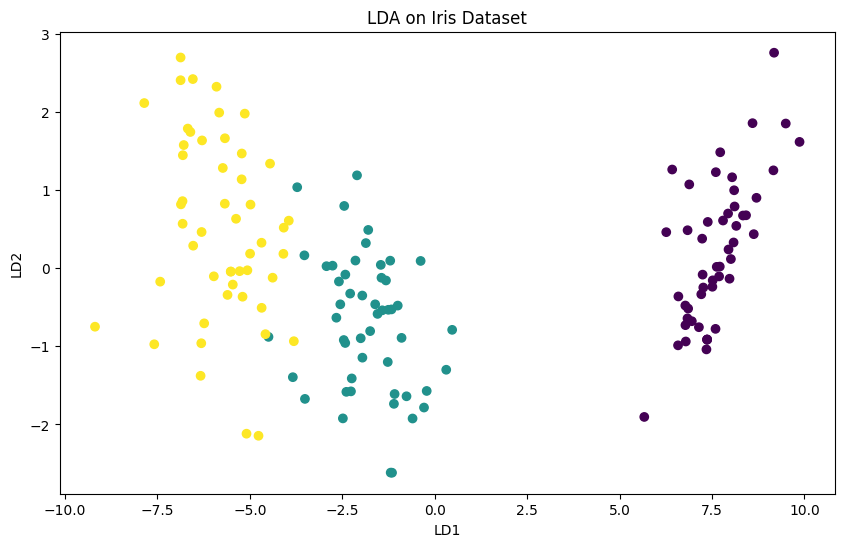

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=lis, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA on Iris Dataset')
plt.show()


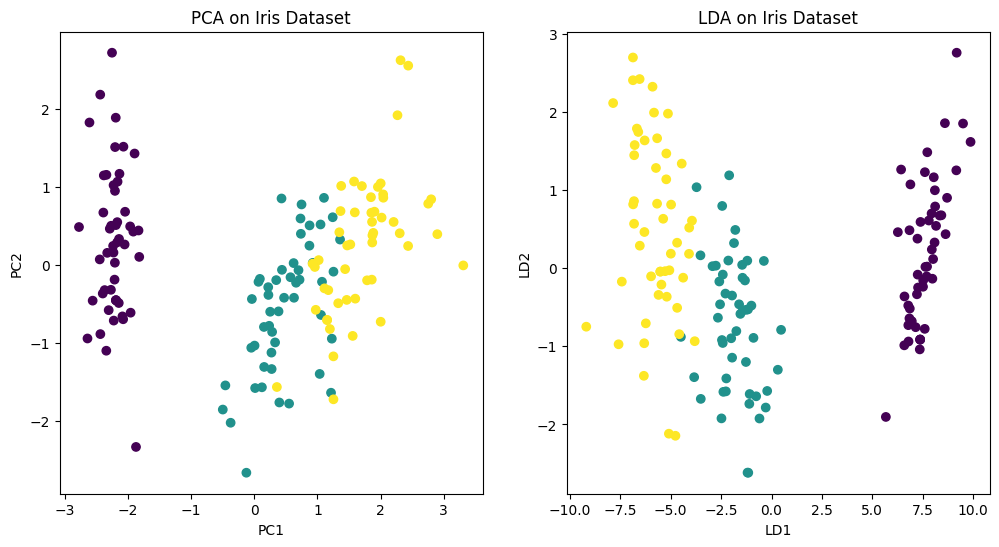

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(principalComponents[:,0], principalComponents[:,1], c=lis, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('PCA on Iris Dataset')

ax[1].scatter(X_lda[:, 0], X_lda[:, 1], c=lis, cmap='viridis')
ax[1].set_xlabel('LD1')
ax[1].set_ylabel('LD2')
ax[1].set_title('LDA on Iris Dataset')

plt.show()


In [52]:
y = df_iris.loc[:,['class']].values
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se